In [1]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 4.7 MB/s eta 0:00:00


Análisis shap values, modelo

In [2]:
import pandas as pd
import shap
import pickle
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PowerTransformer
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [4]:
def seleccionar_columnas(X):
    return X[['confidencialidad',	'relevancia',	'actualidad',
                                          'trazabilidad',	'conformidad',	'exactitudSintactica',
                                          'exactitudSemantica',	'completitud',	'consistencia',
                                          'precision',	'portabilidad',	'credibilidad',
                                          'comprensibilidad',	'accesibilidad',	'unicidad']]


In [5]:
with open('final_model.pkl', 'rb') as file:
    loaded_pipeline = pickle.load(file)


In [6]:
X_test=pd.read_csv('datos_test.csv')
Y_test=X_test['CTR']
X_test=X_test.drop(['CTR'],axis=1)

In [7]:
X_test_processed=loaded_pipeline[0].transform(X_test)


In [8]:
X_test_processed

,confidencialidad,relevancia,actualidad,trazabilidad,conformidad,exactitudSintactica,exactitudSemantica,completitud,consistencia,precision,portabilidad,credibilidad,comprensibilidad,accesibilidad,unicidad
0,10.0,10.0,0,9.85,8.53,7.14,7.14,6.03,9.05,9.05,7.28,8.40,5.22,10,10.00
1,10.0,10.0,0,9.29,9.78,10.00,9.00,9.76,10.00,10.00,9.77,6.52,0.00,10,10.00
2,0.0,10.0,10,8.69,8.87,0.00,0.00,3.33,0.00,0.00,6.10,5.91,0.00,0,5.00
3,10.0,10.0,0,9.92,9.88,7.50,7.50,10.00,9.17,10.00,9.94,6.59,3.33,10,10.00
4,10.0,10.0,0,9.55,9.32,10.00,9.41,9.20,9.93,9.80,9.26,6.21,0.00,10,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,10.0,10.0,10,9.85,9.78,7.50,10.00,10.00,9.17,5.00,9.89,6.52,3.33,10,10.00
1430,10.0,10.0,0,9.47,4.21,7.50,7.50,10.00,9.17,3.75,7.10,6.14,0.00,5,9.94
1431,10.0,10.0,10,9.77,4.66,8.82,8.82,10.00,9.61,9.41,7.33,9.77,6.67,5,10.00
1432,10.0,10.0,0,8.28,6.55,6.00,8.00,6.67,8.67,10.00,6.61,4.39,3.33,0,5.00


In [19]:
explainer = shap.Explainer(loaded_pipeline[1][1])

In [20]:
shap_values = explainer.shap_values(X_test_processed)



In [ ]:
print(shap_values)

[[ 0.00503553  0.0025346   0.00402587 ...  0.          0.
   0.00784916]
 [ 0.0061734   0.0025021   0.0019185  ...  0.          0.
   0.00777671]
 [ 0.00589042  0.00291139 -0.0048788  ...  0.          0.
   0.00825757]
 ...
 [ 0.00459286  0.00240876 -0.00831021 ...  0.          0.
   0.007039  ]
 [ 0.00503553  0.0025346   0.00402587 ...  0.          0.
   0.00784916]
 [ 0.00503553  0.0025346   0.00402587 ...  0.          0.
   0.00784916]]


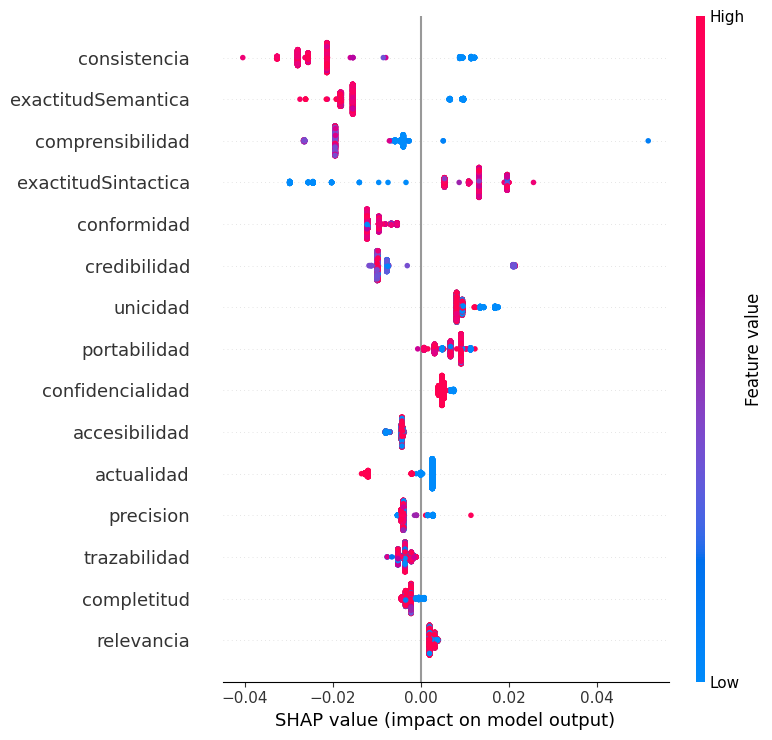

In [21]:
shap.summary_plot(shap_values, X_test_processed)

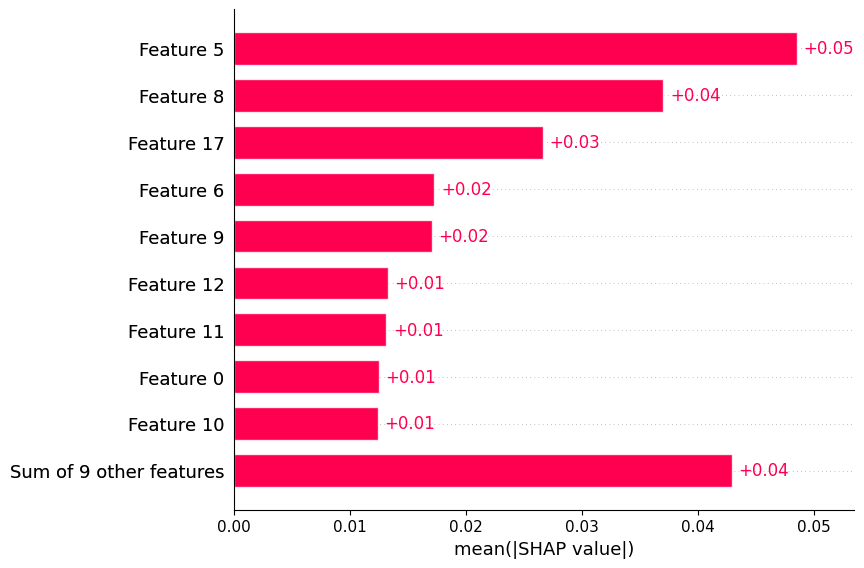

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
shap_values = shap.TreeExplainer(loaded_pipeline[2]).shap_values(X_test_processed)
shap_interaction_values = shap.TreeExplainer(loaded_pipeline[2]).shap_interaction_values(
    X_test_processed
)


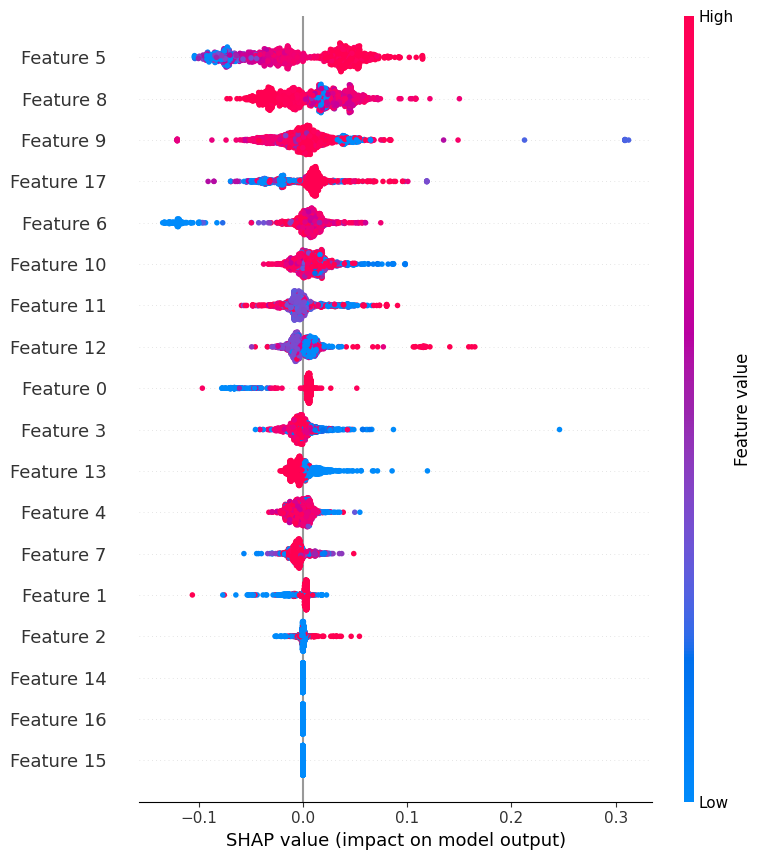

In [ ]:
shap.summary_plot(shap_values, X_test_processed)